In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import numpy as np
from scipy import stats as scipy_stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

# Load BASELINE datasets
df_baseline_api_gateway = pd.read_csv("baseline/retrans_packets/api_gateway.csv")
df_baseline_customers_service = pd.read_csv("baseline/retrans_packets/customers_service.csv")
df_baseline_vets_service = pd.read_csv("baseline/retrans_packets/vets_service.csv")
df_baseline_visits_service = pd.read_csv("baseline/retrans_packets/visits_service.csv")
df_baseline_srtt = pd.read_csv("baseline/srtt.csv")

# Load CACHE FILLING datasets
df_cache_filling_api_gateway = pd.read_csv("cache filling/retrans_packets/api_gateway.csv")
df_cache_filling_customers_service = pd.read_csv("cache filling/retrans_packets/customers_service.csv")
df_cache_filling_vets_service = pd.read_csv("cache filling/retrans_packets/vets_service.csv")
df_cache_filling_visits_service = pd.read_csv("cache filling/retrans_packets/visits_service.csv")
df_cache_filling_srtt = pd.read_csv("cache filling/srtt.csv")

# Load GC STRESS datasets
df_gc_stress_api_gateway = pd.read_csv("gc stress/retrans_packets/api_gateway.csv")
df_gc_stress_customers_service = pd.read_csv("gc stress/retrans_packets/customers_service.csv")
df_gc_stress_vets_service = pd.read_csv("gc stress/retrans_packets/vets_service.csv")
df_gc_stress_visits_service = pd.read_csv("gc stress/retrans_packets/visits_service.csv")
df_gc_stress_srtt = pd.read_csv("gc stress/srtt.csv")

# Load OOM datasets
df_oom_api_gateway = pd.read_csv("oom/retrans_packets/api_gateway.csv")
df_oom_customers_service = pd.read_csv("oom/retrans_packets/customers_service.csv")
df_oom_vets_service = pd.read_csv("oom/retrans_packets/vets_service.csv")
df_oom_visits_service = pd.read_csv("oom/retrans_packets/visits_service.csv")
df_oom_srtt = pd.read_csv("oom/srtt.csv")

# Load THREADFULL datasets
df_threadfull_api_gateway = pd.read_csv("threadfull/retrans_packets/api_gateway.csv")
df_threadfull_customers_service = pd.read_csv("threadfull/retrans_packets/customers_service.csv")
df_threadfull_vets_service = pd.read_csv("threadfull/retrans_packets/vets_service.csv")
df_threadfull_visits_service = pd.read_csv("threadfull/retrans_packets/visits_service.csv")
df_threadfull_srtt = pd.read_csv("threadfull/srtt.csv")


# Add source labels - BASELINE
df_baseline_api_gateway["source"] = "BASELINE"
df_baseline_customers_service["source"] = "BASELINE"
df_baseline_vets_service["source"] = "BASELINE"
df_baseline_visits_service["source"] = "BASELINE"
df_baseline_srtt["source"] = "BASELINE"

# Add source labels - CACHE FILLING
df_cache_filling_api_gateway["source"] = "CACHE_FILLING"
df_cache_filling_customers_service["source"] = "CACHE_FILLING"
df_cache_filling_vets_service["source"] = "CACHE_FILLING"
df_cache_filling_visits_service["source"] = "CACHE_FILLING"
df_cache_filling_srtt["source"] = "CACHE_FILLING"

# Add source labels - GC STRESS
df_gc_stress_api_gateway["source"] = "GC_STRESS"
df_gc_stress_customers_service["source"] = "GC_STRESS"
df_gc_stress_vets_service["source"] = "GC_STRESS"
df_gc_stress_visits_service["source"] = "GC_STRESS"
df_gc_stress_srtt["source"] = "GC_STRESS"

# Add source labels - OOM
df_oom_api_gateway["source"] = "OOM"
df_oom_customers_service["source"] = "OOM"
df_oom_vets_service["source"] = "OOM"
df_oom_visits_service["source"] = "OOM"
df_oom_srtt["source"] = "OOM"

# Add source labels - THREADFULL
df_threadfull_api_gateway["source"] = "THREADFULL"
df_threadfull_customers_service["source"] = "THREADFULL"
df_threadfull_vets_service["source"] = "THREADFULL"
df_threadfull_visits_service["source"] = "THREADFULL"
df_threadfull_srtt["source"] = "THREADFULL"


# Convert to datetime - BASELINE
df_baseline_api_gateway["Time"] = pd.to_datetime(df_baseline_api_gateway["Time"])
df_baseline_customers_service["Time"] = pd.to_datetime(df_baseline_customers_service["Time"])
df_baseline_vets_service["Time"] = pd.to_datetime(df_baseline_vets_service["Time"])
df_baseline_visits_service["Time"] = pd.to_datetime(df_baseline_visits_service["Time"])
df_baseline_srtt["Time"] = pd.to_datetime(df_baseline_srtt["Time"])

# Convert to datetime - CACHE FILLING
df_cache_filling_api_gateway["Time"] = pd.to_datetime(df_cache_filling_api_gateway["Time"])
df_cache_filling_customers_service["Time"] = pd.to_datetime(df_cache_filling_customers_service["Time"])
df_cache_filling_vets_service["Time"] = pd.to_datetime(df_cache_filling_vets_service["Time"])
df_cache_filling_visits_service["Time"] = pd.to_datetime(df_cache_filling_visits_service["Time"])
df_cache_filling_srtt["Time"] = pd.to_datetime(df_cache_filling_srtt["Time"])

# Convert to datetime - GC STRESS
df_gc_stress_api_gateway["Time"] = pd.to_datetime(df_gc_stress_api_gateway["Time"])
df_gc_stress_customers_service["Time"] = pd.to_datetime(df_gc_stress_customers_service["Time"])
df_gc_stress_vets_service["Time"] = pd.to_datetime(df_gc_stress_vets_service["Time"])
df_gc_stress_visits_service["Time"] = pd.to_datetime(df_gc_stress_visits_service["Time"])
df_gc_stress_srtt["Time"] = pd.to_datetime(df_gc_stress_srtt["Time"])

# Convert to datetime - OOM
df_oom_api_gateway["Time"] = pd.to_datetime(df_oom_api_gateway["Time"])
df_oom_customers_service["Time"] = pd.to_datetime(df_oom_customers_service["Time"])
df_oom_vets_service["Time"] = pd.to_datetime(df_oom_vets_service["Time"])
df_oom_visits_service["Time"] = pd.to_datetime(df_oom_visits_service["Time"])
df_oom_srtt["Time"] = pd.to_datetime(df_oom_srtt["Time"])

# Convert to datetime - THREADFULL
df_threadfull_api_gateway["Time"] = pd.to_datetime(df_threadfull_api_gateway["Time"])
df_threadfull_customers_service["Time"] = pd.to_datetime(df_threadfull_customers_service["Time"])
df_threadfull_vets_service["Time"] = pd.to_datetime(df_threadfull_vets_service["Time"])
df_threadfull_visits_service["Time"] = pd.to_datetime(df_threadfull_visits_service["Time"])
df_threadfull_srtt["Time"] = pd.to_datetime(df_threadfull_srtt["Time"])


delay = 30
duration = 50

# Synchronize all datasets with baseline timeline
time_offset = df_baseline_api_gateway["Time"].min()

# Synchronize CPU STRESS datasets
cpustress_offset = time_offset - df_cache_filling_api_gateway["Time"].min()
df_cache_filling_api_gateway["Time"] += cpustress_offset
df_cache_filling_customers_service["Time"] += cpustress_offset
df_cache_filling_vets_service["Time"] += cpustress_offset
df_cache_filling_visits_service["Time"] += cpustress_offset
df_cache_filling_srtt["Time"] += cpustress_offset

# Synchronize DELAY datasets
delay_offset = time_offset - df_gc_stress_api_gateway["Time"].min()
df_gc_stress_api_gateway["Time"] += delay_offset
df_gc_stress_customers_service["Time"] += delay_offset
df_gc_stress_vets_service["Time"] += delay_offset
df_gc_stress_visits_service["Time"] += delay_offset
df_gc_stress_srtt["Time"] += delay_offset

# Synchronize MEM STRESS datasets
memstress_offset = time_offset - df_oom_api_gateway["Time"].min()
df_oom_api_gateway["Time"] += memstress_offset
df_oom_customers_service["Time"] += memstress_offset
df_oom_vets_service["Time"] += memstress_offset
df_oom_visits_service["Time"] += memstress_offset
df_oom_srtt["Time"] += memstress_offset

# Synchronize NET LOSS datasets
netloss_offset = time_offset - df_threadfull_api_gateway["Time"].min()
df_threadfull_api_gateway["Time"] += netloss_offset
df_threadfull_customers_service["Time"] += netloss_offset
df_threadfull_vets_service["Time"] += netloss_offset
df_threadfull_visits_service["Time"] += netloss_offset
df_threadfull_srtt["Time"] += netloss_offset


# Convert timeline to minutes for ALL datasets
all_dfs = [
    # Baseline
    df_baseline_api_gateway, df_baseline_customers_service, df_baseline_vets_service, 
    df_baseline_visits_service, df_baseline_srtt,
    # CPU Stress
    df_cache_filling_api_gateway, df_cache_filling_customers_service, df_cache_filling_vets_service, 
    df_cache_filling_visits_service, df_cache_filling_srtt,
    # Delay
    df_gc_stress_api_gateway, df_gc_stress_customers_service, df_gc_stress_vets_service, 
    df_gc_stress_visits_service, df_gc_stress_srtt,
    # Memory Stress
    df_oom_api_gateway, df_oom_customers_service, df_oom_vets_service, 
    df_oom_visits_service, df_oom_srtt,
    # Network Loss
    df_threadfull_api_gateway, df_threadfull_customers_service, df_threadfull_vets_service, 
    df_threadfull_visits_service, df_threadfull_srtt
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# COMPLETE DATASETS DICTIONARY 
all_datasets = {
    'ApiGateway': {
        'baseline': df_baseline_api_gateway,
        'cpu_stress': df_cache_filling_api_gateway,
        'delay': df_gc_stress_api_gateway,
        'mem_stress': df_oom_api_gateway,
        'net_loss': df_threadfull_api_gateway,
    },
    'CustomersService': {
        'baseline': df_baseline_customers_service,
        'cpu_stress': df_cache_filling_customers_service,
        'delay': df_gc_stress_customers_service,
        'mem_stress': df_oom_customers_service,
        'net_loss': df_threadfull_customers_service,
    },
    'VetsService': {
        'baseline': df_baseline_vets_service,
        'cpu_stress': df_cache_filling_vets_service,
        'delay': df_gc_stress_vets_service,
        'mem_stress': df_oom_vets_service,
        'net_loss': df_threadfull_vets_service,
    },
    'VisitsService': {
        'baseline': df_baseline_visits_service,
        'cpu_stress': df_cache_filling_visits_service,
        'delay': df_gc_stress_visits_service,
        'mem_stress': df_oom_visits_service,
        'net_loss': df_threadfull_visits_service,
    },
    'SRTT': {
        'baseline': df_baseline_srtt,
        'cpu_stress': df_cache_filling_srtt,
        'delay': df_gc_stress_srtt,
        'mem_stress': df_oom_srtt,
        'net_loss': df_threadfull_srtt,
    }
}

print("✅ All TCP retransmission datasets loaded successfully!")
print(f"📊 Loaded {len(all_datasets)} TCP metrics across {len(all_datasets['ApiGateway'])} experiment types")
print("\nDataset structure:")
for metric, experiments in all_datasets.items():
    print(f"  {metric}: {list(experiments.keys())}")

✅ All TCP retransmission datasets loaded successfully!
📊 Loaded 5 TCP metrics across 5 experiment types

Dataset structure:
  ApiGateway: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  CustomersService: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  VetsService: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  VisitsService: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  SRTT: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']


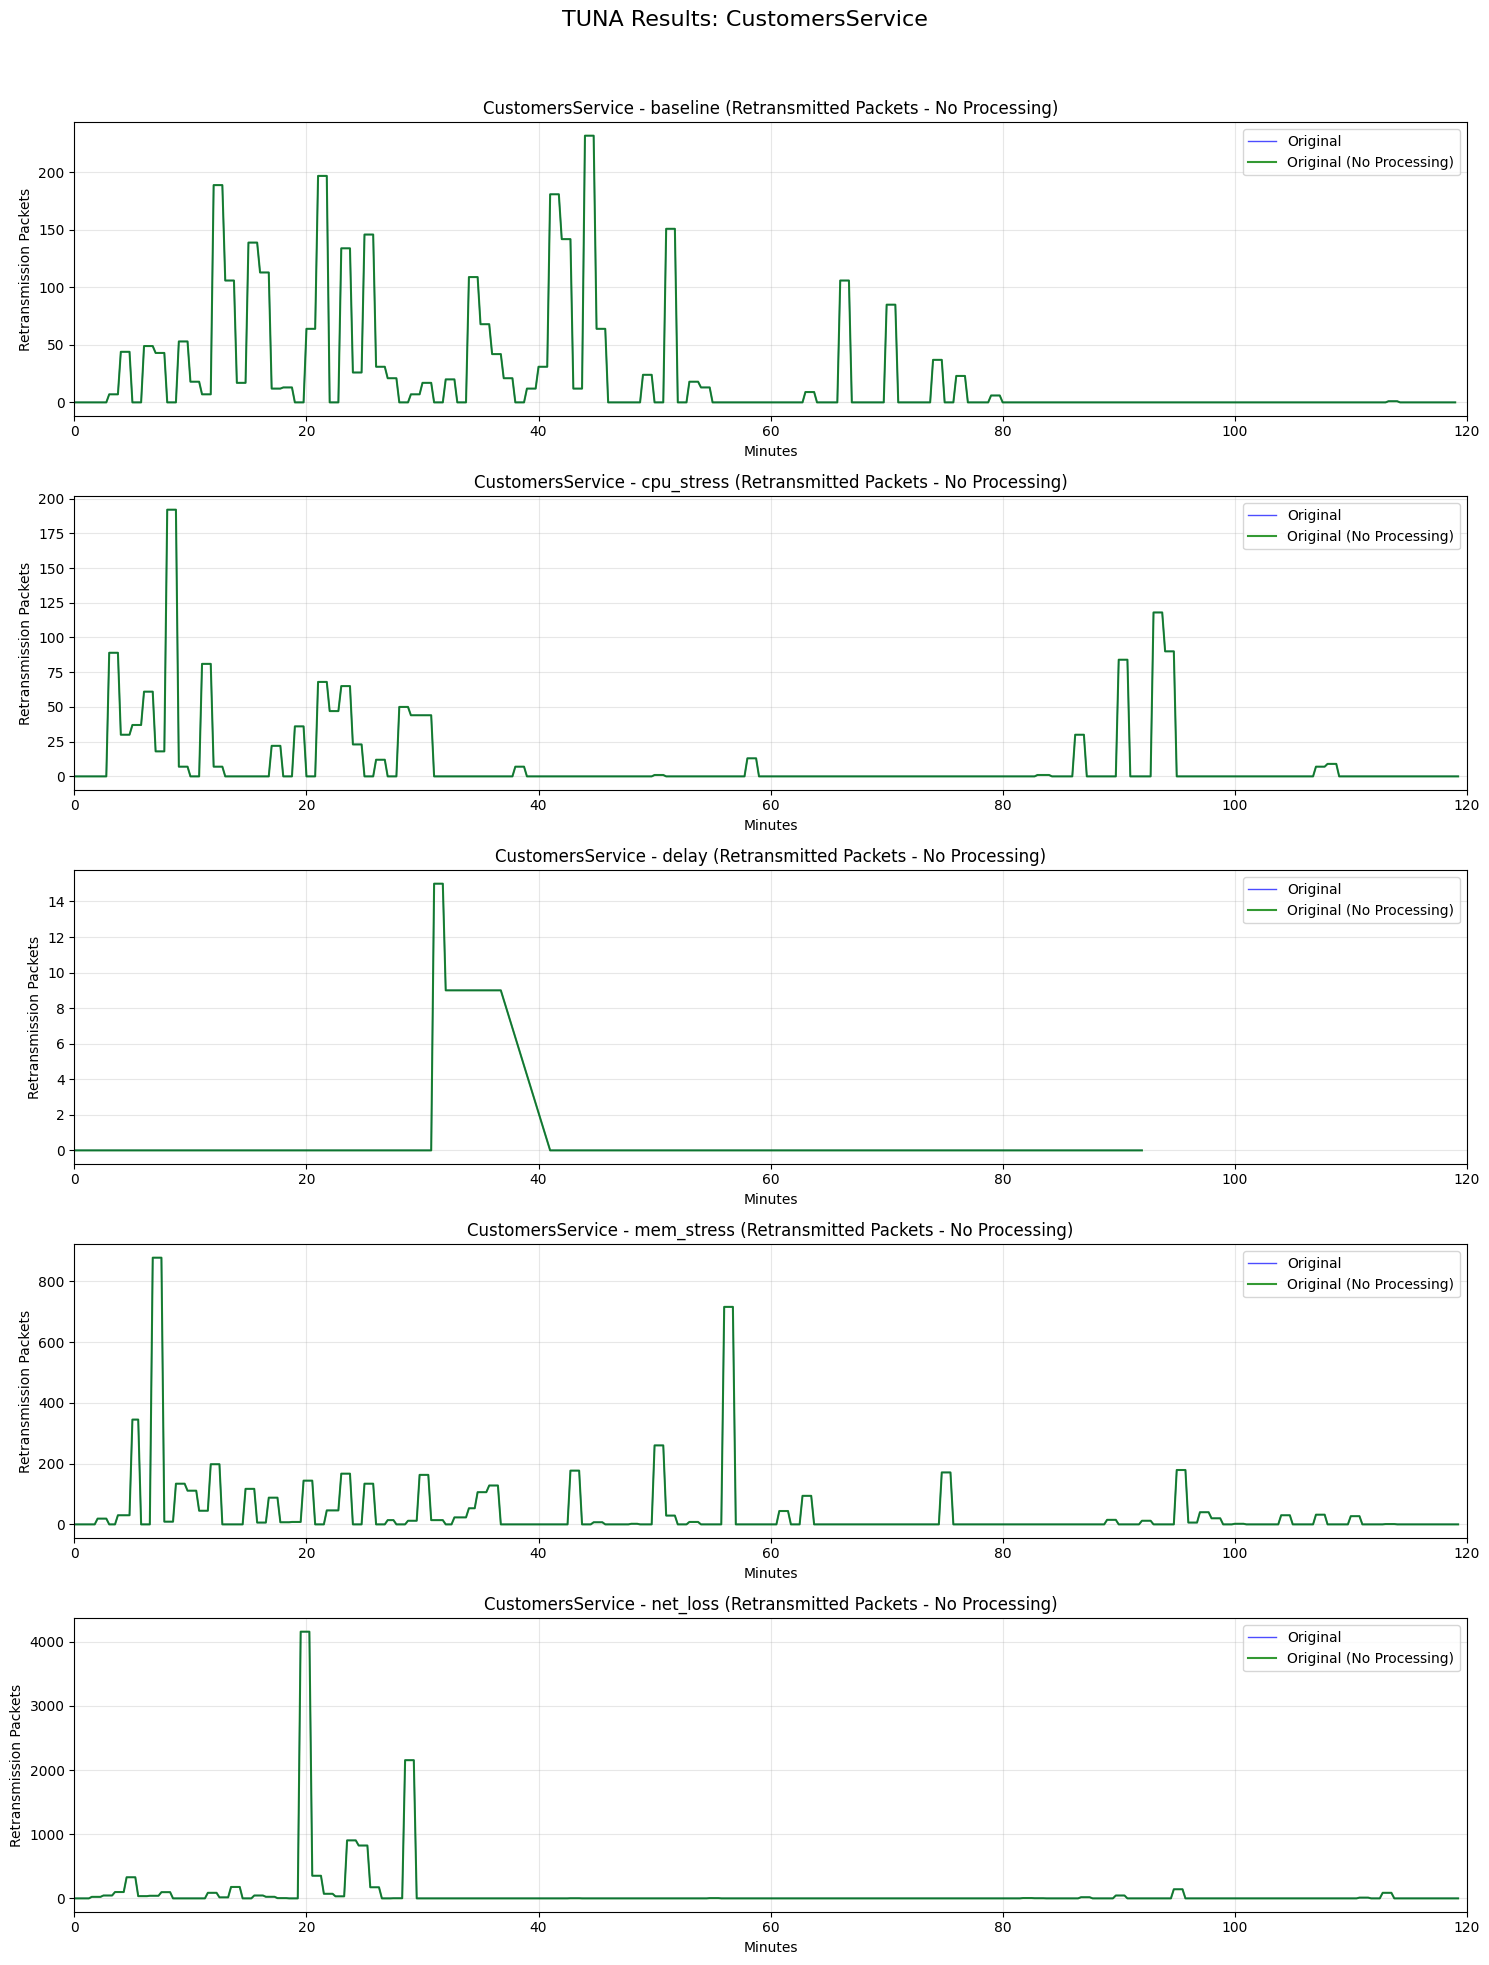

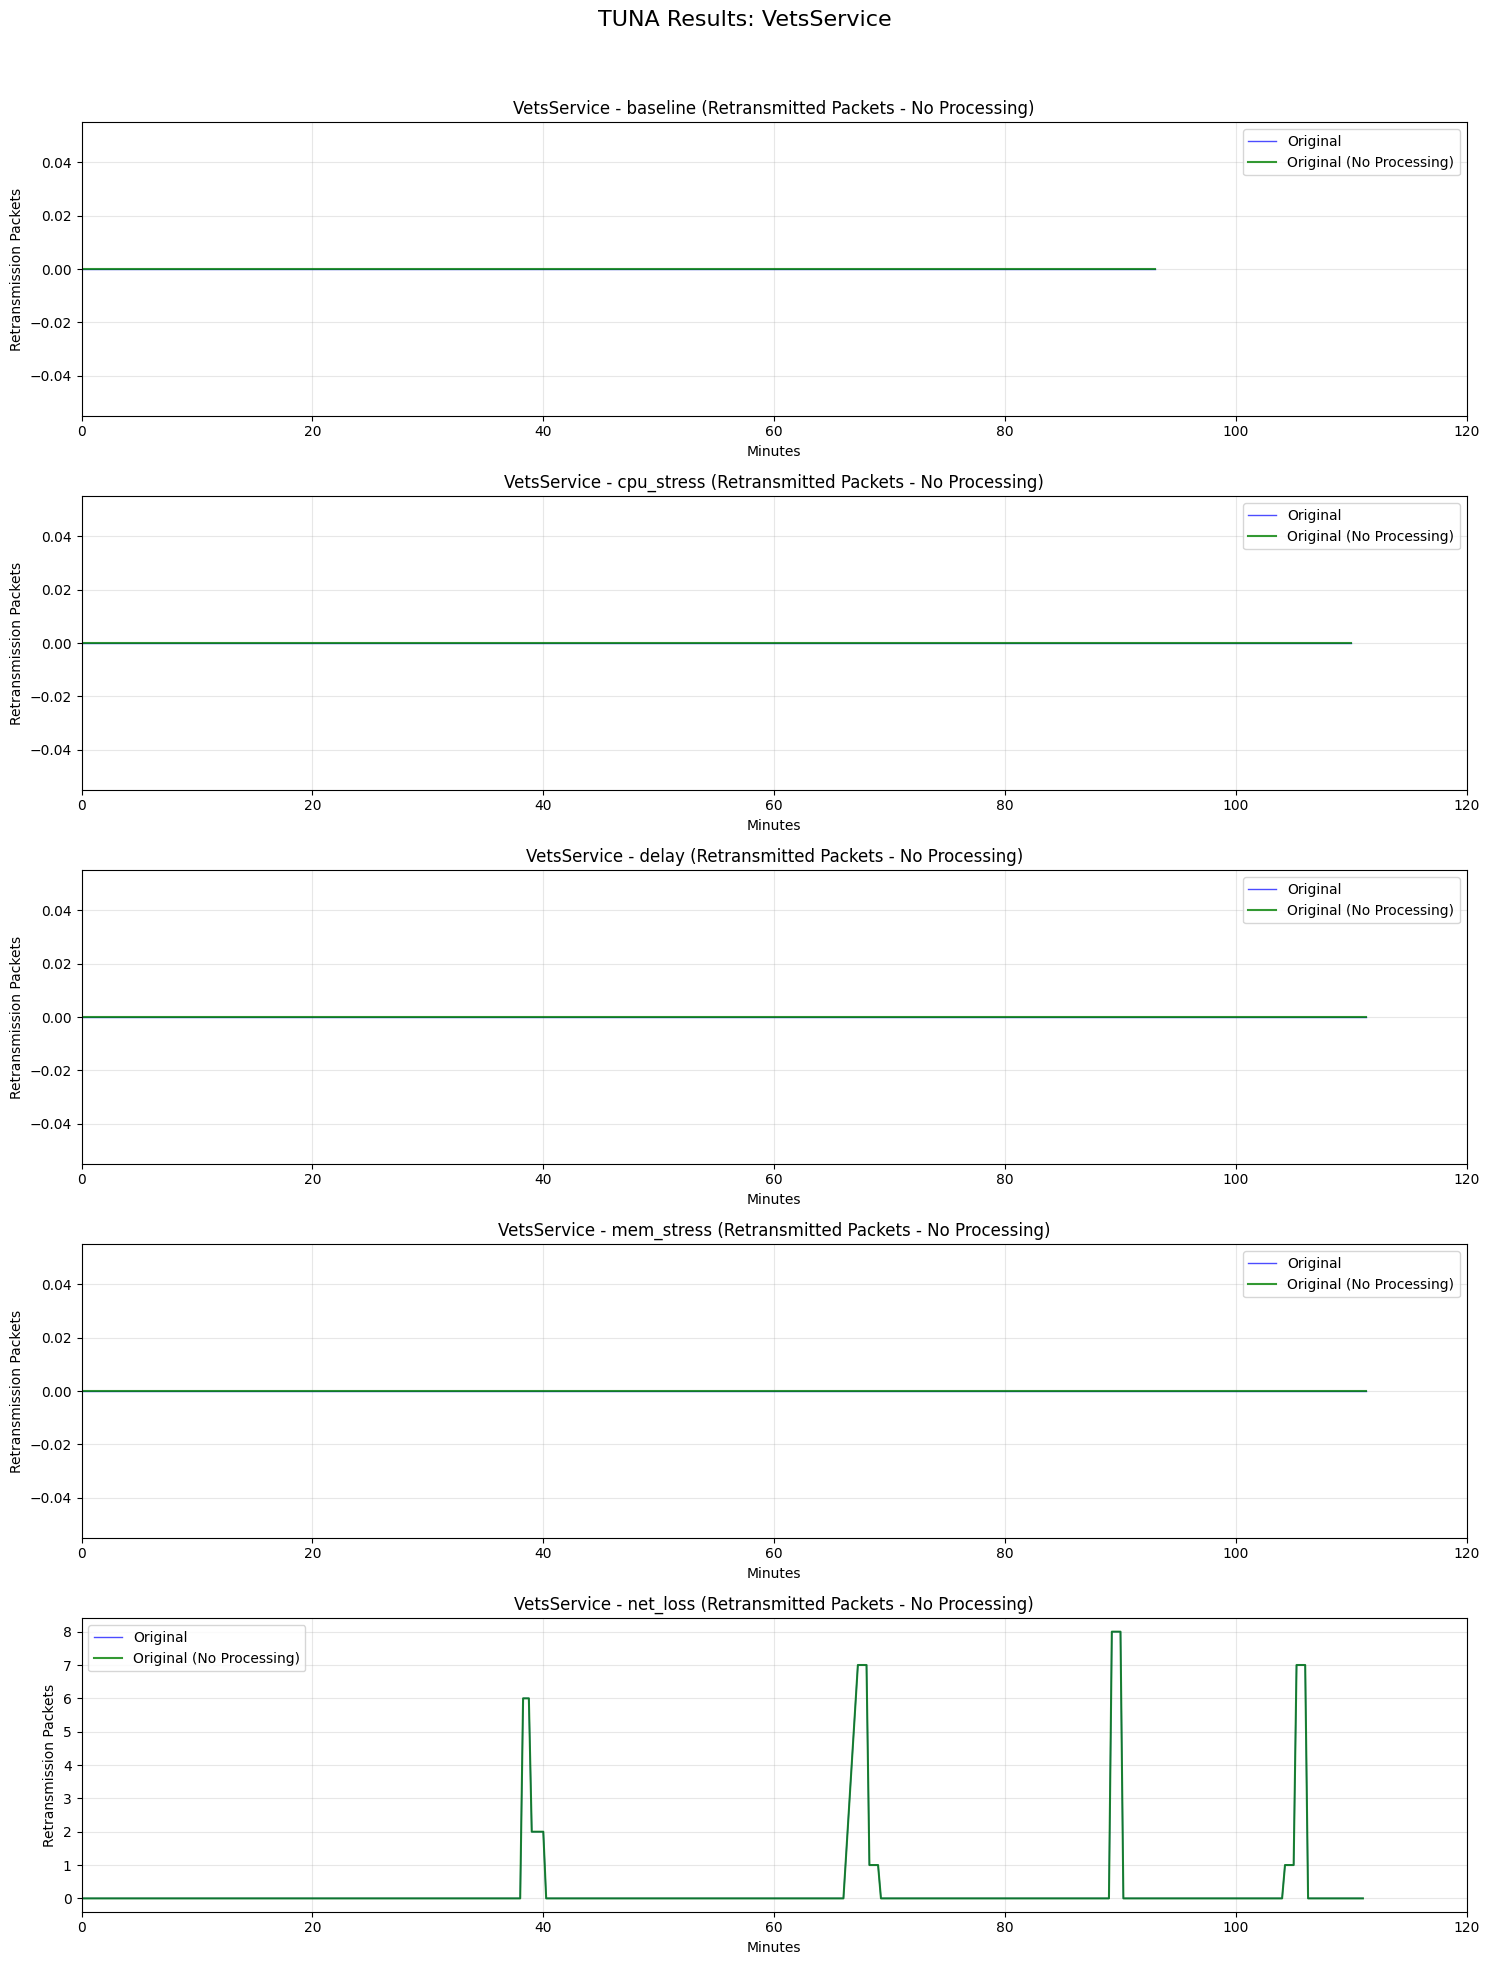

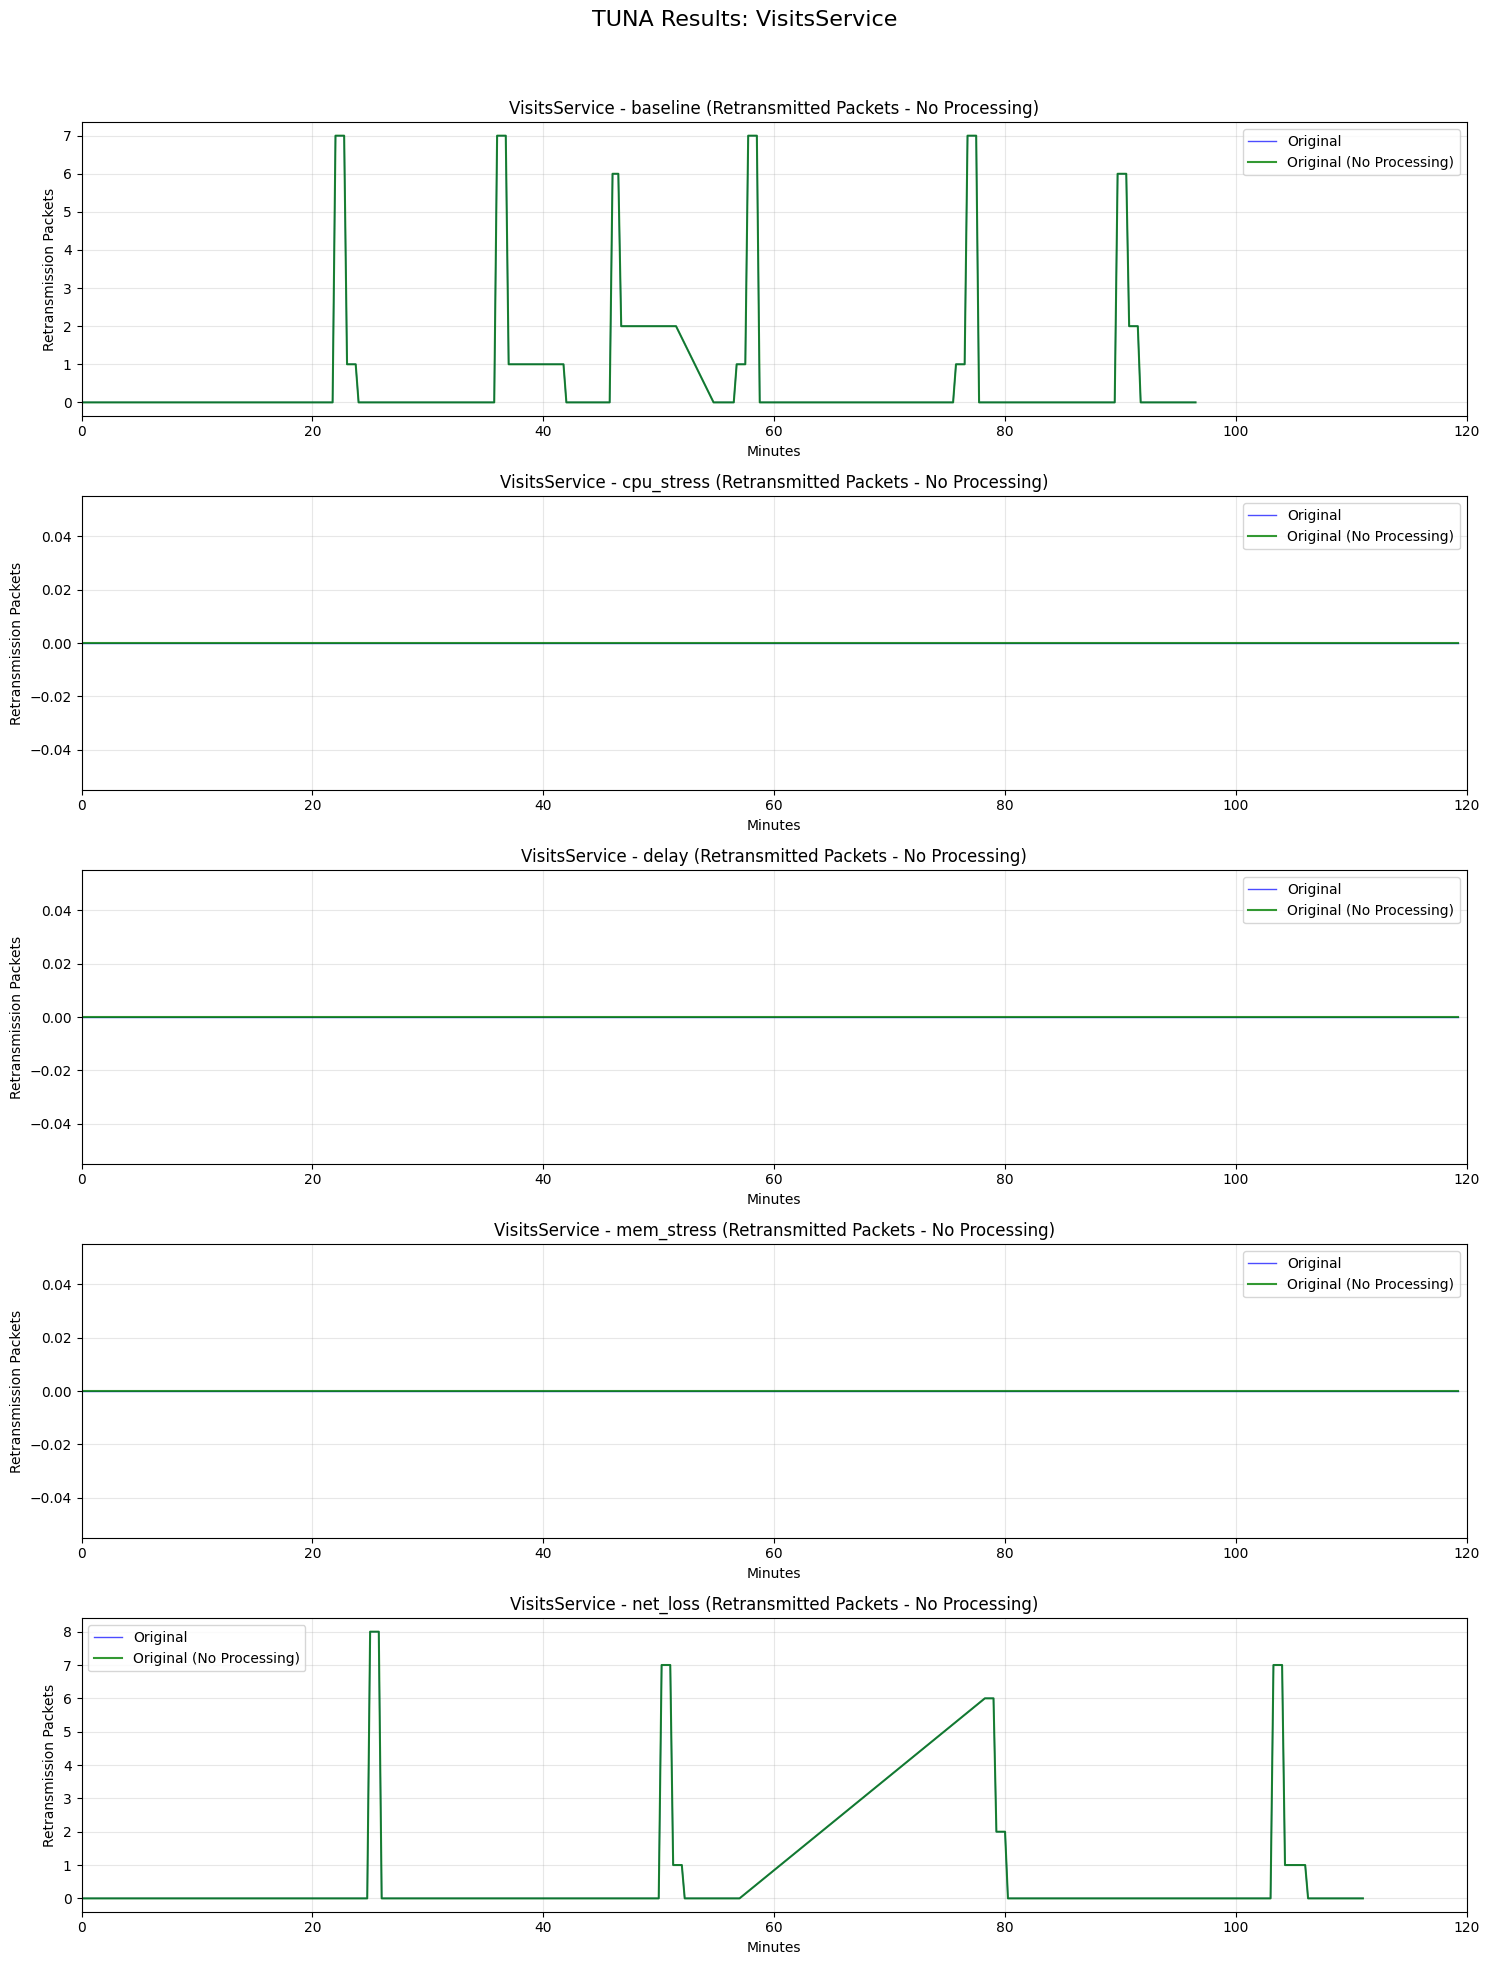

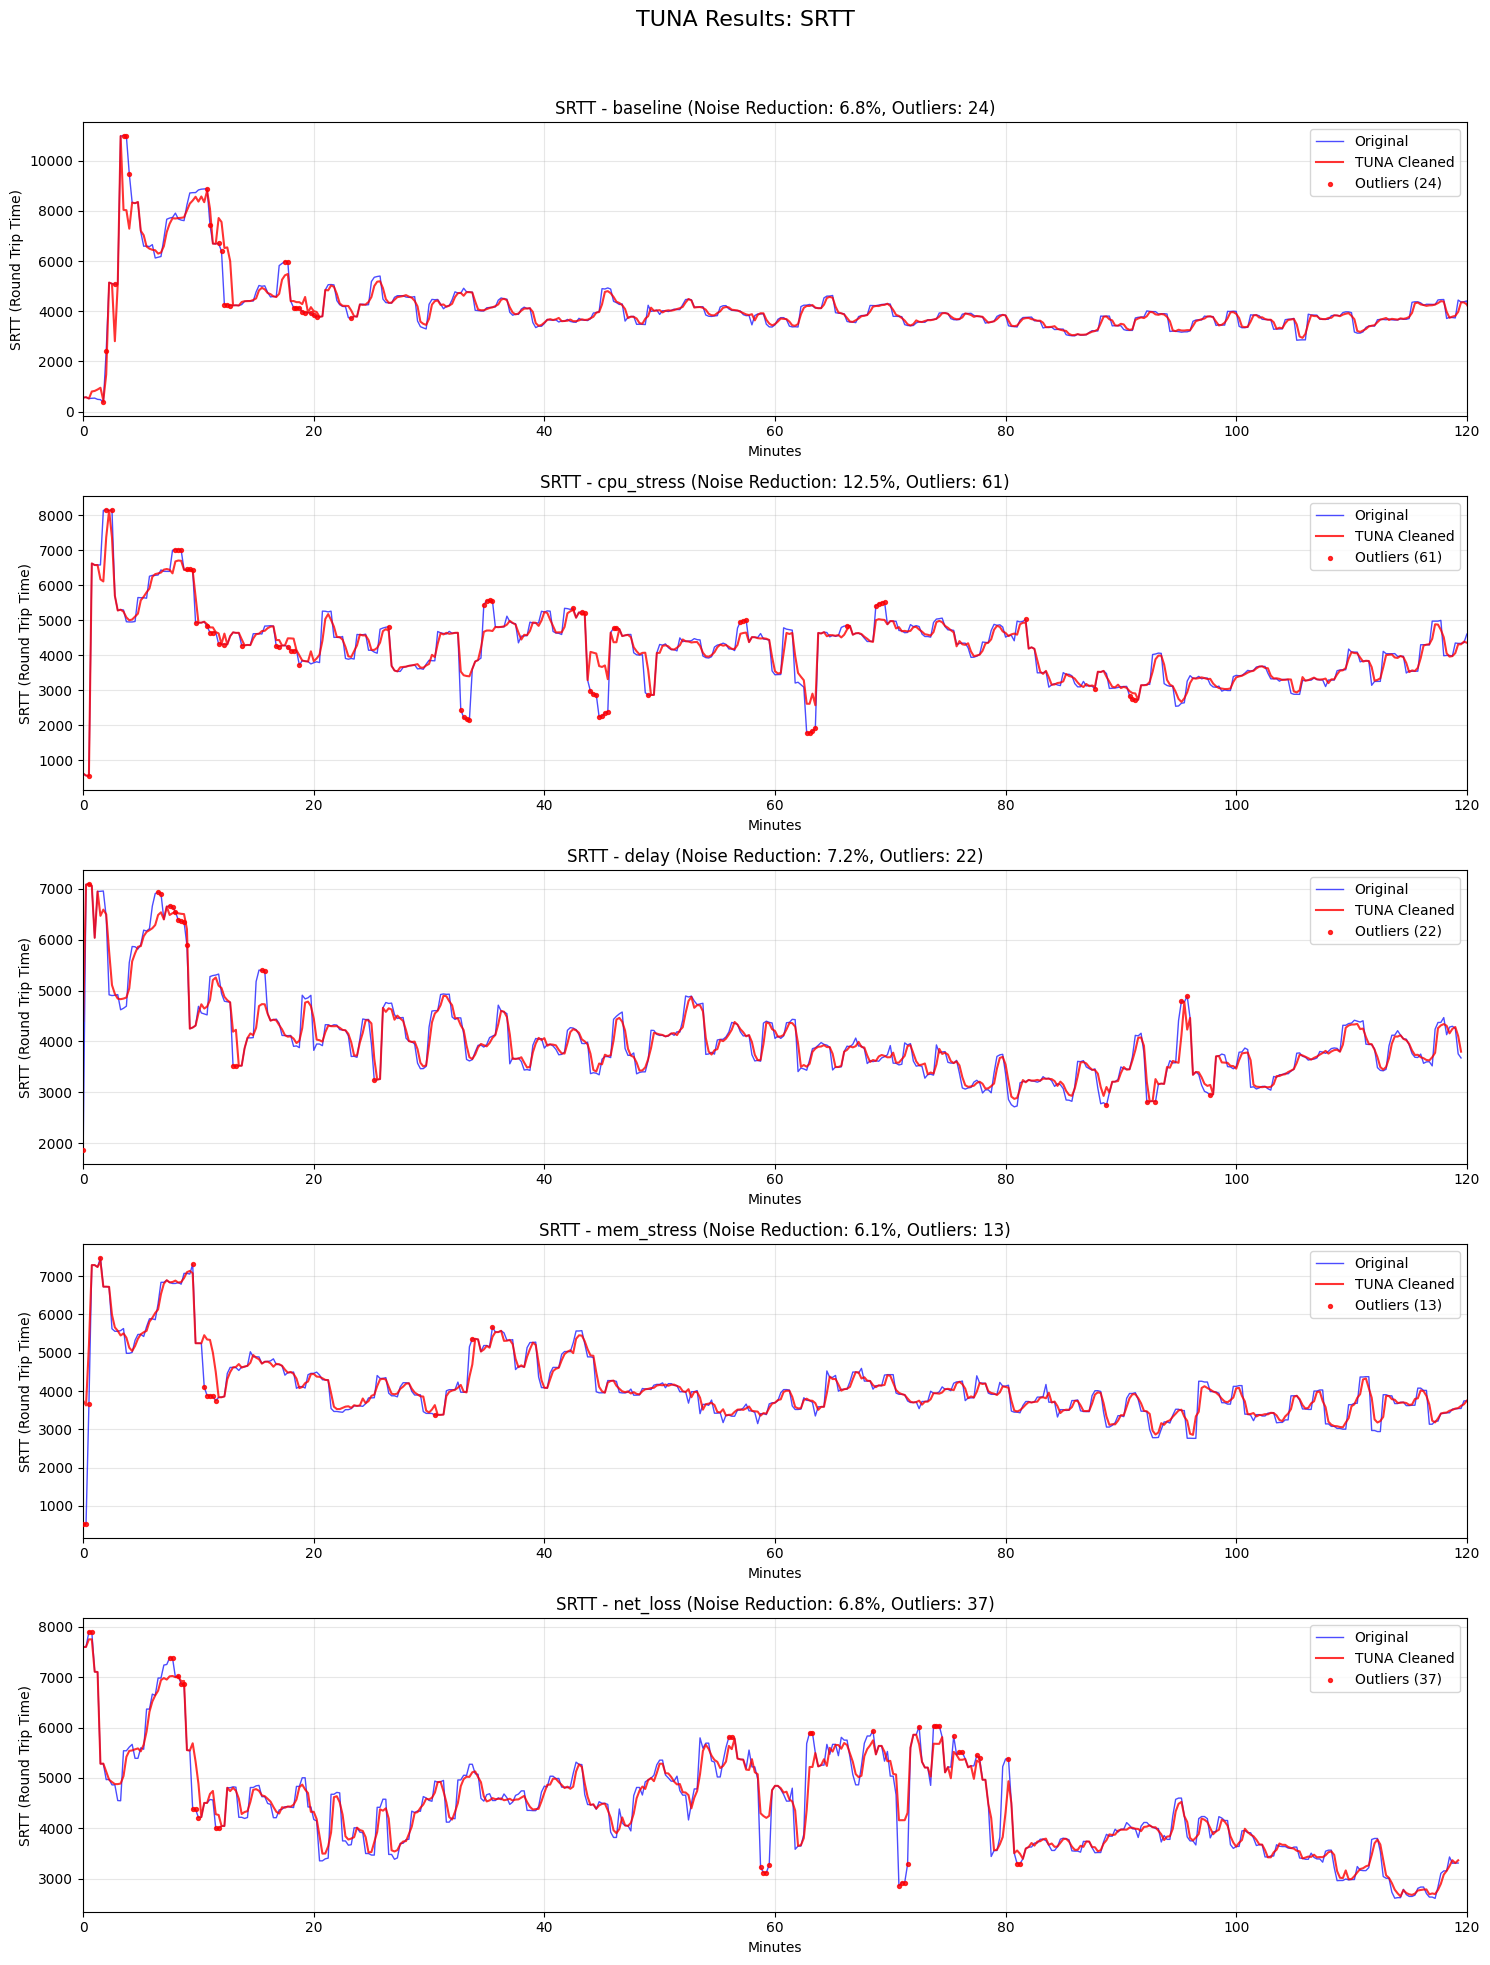


TUNA Results Summary:
Metric          Experiment      Outliers   Noise Red%   Correlation 
----------------------------------------------------------------------
CustomersService baseline        0                 0.0%       1.000
CustomersService cpu_stress      0                 0.0%       1.000
CustomersService delay           0                 0.0%       1.000
CustomersService mem_stress      0                 0.0%       1.000
CustomersService net_loss        0                 0.0%       1.000
VetsService     baseline        0                 0.0%       1.000
VetsService     cpu_stress      0                 0.0%       1.000
VetsService     delay           0                 0.0%       1.000
VetsService     mem_stress      0                 0.0%       1.000
VetsService     net_loss        0                 0.0%       1.000
VisitsService   baseline        0                 0.0%       1.000
VisitsService   cpu_stress      0                 0.0%       1.000
VisitsService   delay       

In [14]:
def safe_convert_to_float(series):
    try:
        return pd.to_numeric(series, errors='coerce').fillna(0.0).astype(float)
    except:
        return series.fillna(0.0).astype(float)

def safe_array_conversion(data):
    data = np.array(data, dtype=float)
    if np.any(np.isnan(data)):
        data = np.nan_to_num(data, nan=0.0)
    return data

def extract_tcp_values(df, metric_name):
    exclude_cols = ['Time', 'Minutes', 'source']
    value_cols = [col for col in df.columns if col not in exclude_cols]
    
    if len(value_cols) == 1:
        return safe_convert_to_float(df[value_cols[0]])
    else:
        return df[value_cols].fillna(0.0).sum(axis=1).values

def get_tuna_parameters(metric_name, experiment_type):
    """Get consistent TUNA parameters for TCP metrics using memory logic"""
    
    if "srtt" in metric_name.lower():
        window_size = 40
        threshold = 0.5
    
    min_absolute_range_factor = 0.2
    penalty_factor = 0.5
    lookback_window = 10
    
    return {
        'window_size': window_size,
        'threshold': threshold,
        'min_absolute_range_factor': min_absolute_range_factor,
        'penalty_factor': penalty_factor,
        'lookback_window': min(lookback_window, 15)
    }

def detect_outliers_tuna_memory(timeseries, metric_name="", experiment_type=""):
    """TUNA's relative range outlier detection with MIN/MAX marking - Memory Logic"""
    
    timeseries = safe_array_conversion(timeseries)
    outlier_mask = np.zeros(len(timeseries), dtype=bool)
    params = get_tuna_parameters(metric_name, experiment_type)
    
    window_size = params['window_size']
    threshold = params['threshold']
    min_absolute_range = params['min_absolute_range_factor'] * np.std(timeseries)
    
    for i in range(0, len(timeseries) - window_size + 1, 1):
        window = timeseries[i:i + window_size]
        window_mean = np.mean(window)
        window_range = np.max(window) - np.min(window)
        
        if window_mean > 0:
            relative_range = window_range / window_mean
            
            if relative_range > threshold and window_range > min_absolute_range:
                window_max = np.max(window)
                window_min = np.min(window)
                
                for j in range(window_size):
                    actual_idx = i + j
                    if actual_idx < len(timeseries):
                        if (timeseries[actual_idx] == window_max or 
                            timeseries[actual_idx] == window_min):
                            outlier_mask[actual_idx] = True
    
    return outlier_mask

def get_local_stable_baseline(timeseries, stable_mask, current_idx, lookback_window):
    """Get local baseline from recent stable points - Memory logic"""
    
    start_idx = max(0, current_idx - lookback_window)
    local_window = timeseries[start_idx:current_idx]
    local_stable_mask = stable_mask[start_idx:current_idx]
    
    recent_stable = local_window[local_stable_mask]
    
    if len(recent_stable) >= 3:
        return np.median(recent_stable)
    elif len(recent_stable) >= 1:
        return np.mean(recent_stable)
    
    end_idx = min(len(timeseries), current_idx + lookback_window)
    forward_window = timeseries[current_idx+1:end_idx]
    forward_stable_mask = stable_mask[current_idx+1:end_idx]
    
    forward_stable = forward_window[forward_stable_mask]
    
    if len(forward_stable) >= 1:
        return np.median(forward_stable) if len(forward_stable) >= 3 else np.mean(forward_stable)
    
    stable_values = timeseries[stable_mask]
    return np.median(stable_values) if len(stable_values) > 0 else np.median(timeseries)

def apply_penalty_local_trend(timeseries, outlier_mask, metric_name="", experiment_type=""):
    """Apply penalty based on local stable trend - Memory logic"""
    
    timeseries = safe_array_conversion(timeseries)
    cleaned_series = timeseries.copy()
    stable_mask = ~outlier_mask
    params = get_tuna_parameters(metric_name, experiment_type)
    
    effective_penalty = params['penalty_factor']
    lookback_window = params['lookback_window']
    
    for i in range(len(timeseries)):
        if outlier_mask[i]:
            local_baseline = get_local_stable_baseline(timeseries, stable_mask, i, lookback_window)
            original_value = timeseries[i]
            deviation = original_value - local_baseline
            cleaned_series[i] = local_baseline + deviation * effective_penalty
    
    return cleaned_series

def create_features_for_ml(timeseries, stable_mask, experiment_type):
    """Create features ONLY from stable regions - Memory logic"""
    
    timeseries = safe_array_conversion(timeseries)
    features = []
    feature_indices = []
    window_size = 3
    
    for i in range(window_size, len(timeseries)):
        if stable_mask[i]:
            window = timeseries[i-window_size:i]
            window_stable_mask = stable_mask[i-window_size:i]
            
            stable_ratio = np.sum(window_stable_mask) / len(window_stable_mask)
            if stable_ratio >= 0.8:
                stable_window = window[window_stable_mask]
                
                if len(stable_window) > 0:
                    feature_vector = [
                        np.mean(stable_window),
                        np.std(stable_window),
                        np.median(stable_window),
                        np.max(stable_window) - np.min(stable_window),
                        timeseries[i-1] if stable_mask[i-1] else np.mean(stable_window),
                        i / len(timeseries),
                    ]
                    
                    feature_vector = [0.0 if np.isnan(val) or np.isinf(val) else float(val) for val in feature_vector]
                    
                    exp_features = [0, 0, 0, 0, 0]
                    if experiment_type == "baseline":
                        exp_features[0] = 1
                    elif experiment_type == "cpu_stress":
                        exp_features[1] = 1
                    elif experiment_type == "delay":
                        exp_features[2] = 1
                    elif experiment_type == "mem_stress":
                        exp_features[3] = 1
                    elif experiment_type == "net_loss":
                        exp_features[4] = 1
                    
                    feature_vector.extend(exp_features)
                    features.append(feature_vector)
                    feature_indices.append(i)
    
    return np.array(features), np.array(feature_indices)

def train_models_for_all_columns(metric_name, all_experiments):
    """Train RandomForest models using stable periods - Only for SRTT"""
    
    if not should_apply_tuna(metric_name):
        return None, None
    
    X_stable_all = []
    y_stable_all = []
    
    for exp_name, df in all_experiments.items():
        tcp_values = extract_tcp_values(df, metric_name)
        tcp_values = safe_array_conversion(tcp_values)
        
        outlier_mask = detect_outliers_tuna_memory(tcp_values, metric_name=metric_name, experiment_type=exp_name)
        stable_mask = ~outlier_mask
        
        features, feature_indices = create_features_for_ml(tcp_values, stable_mask, exp_name)
        
        if len(features) > 0:
            stable_targets = tcp_values[feature_indices]
            
            valid_mask = ~(np.isnan(stable_targets) | np.isinf(stable_targets))
            stable_features = features[valid_mask]
            stable_targets = stable_targets[valid_mask]
            
            if len(stable_features) > 0:
                smoothed_targets = []
                for j, target in enumerate(stable_targets):
                    start_idx = max(0, j-2)
                    end_idx = min(len(stable_targets), j+3)
                    local_values = stable_targets[start_idx:end_idx]
                    smoothed_targets.append(np.median(local_values))
                
                X_stable_all.extend(stable_features)
                y_stable_all.extend(smoothed_targets)
    
    if len(X_stable_all) >= 10:
        X_stable_all = np.array(X_stable_all)
        y_stable_all = np.array(y_stable_all)
        
        nan_mask = np.isnan(y_stable_all) | np.isinf(y_stable_all)
        if np.any(nan_mask):
            X_stable_all = X_stable_all[~nan_mask]
            y_stable_all = y_stable_all[~nan_mask]
        
        feature_nan_mask = np.isnan(X_stable_all).any(axis=1) | np.isinf(X_stable_all).any(axis=1)
        if np.any(feature_nan_mask):
            X_stable_all = X_stable_all[~feature_nan_mask]
            y_stable_all = y_stable_all[~feature_nan_mask]
        
        if len(X_stable_all) >= 10:
            try:
                scaler = StandardScaler()
                X_scaled = scaler.fit_transform(X_stable_all)
                
                param_grid = {
                    'n_estimators': [100],
                    'max_depth': [5, 10, 15],
                    'min_samples_split': [2, 5],
                    'min_samples_leaf': [1, 2, 4],
                    'max_features': ['sqrt', 'log2']
                }
                
                model = RandomForestRegressor(
                    criterion='squared_error',
                    bootstrap=True,
                    n_jobs=-1,
                    random_state=42
                )
                
                grid_search = GridSearchCV(
                    estimator=model,
                    param_grid=param_grid,
                    scoring='neg_mean_squared_error',
                    cv=3,
                    n_jobs=-1,
                    verbose=0
                )
                
                grid_search.fit(X_scaled, y_stable_all)
                return grid_search.best_estimator_, scaler
            except Exception:
                return None, None
    
    return None, None

def should_apply_tuna(metric_name):
    """Determines if TUNA should be applied - only to SRTT"""
    return 'srtt' in metric_name.lower()

def apply_tuna_to_single_series(tcp_values, exp_name, model, scaler, metric_name=""):
    """Apply TUNA cleaning to a single series - Only for SRTT"""
    
    tcp_values = safe_array_conversion(tcp_values)
    
    if not should_apply_tuna(metric_name):
        outlier_mask = np.zeros(len(tcp_values), dtype=bool)
        cleaning_stats = {
            'outliers': 0,
            'noise_reduction': 0.0,
            'correlation': 1.0,
            'tuna_applied': False
        }
        return tcp_values, outlier_mask, cleaning_stats
    
    outlier_mask = detect_outliers_tuna_memory(tcp_values, metric_name=metric_name, experiment_type=exp_name)
    stable_mask = ~outlier_mask
    outliers_count = np.sum(outlier_mask)
    
    cleaned_series = tcp_values.copy()
    if outliers_count > 0:
        cleaned_series = apply_penalty_local_trend(tcp_values, outlier_mask, metric_name, exp_name)
    
    if model is not None and scaler is not None:
        features, feature_indices = create_features_for_ml(tcp_values, stable_mask, exp_name)
        
        if len(features) > 0:
            try:
                features_scaled = scaler.transform(features)
                ml_predictions = model.predict(features_scaled)
                
                for i, prediction in enumerate(ml_predictions):
                    actual_idx = feature_indices[i]
                    if actual_idx < len(cleaned_series) and stable_mask[actual_idx]:
                        if not np.isnan(prediction) and not np.isinf(prediction):
                            cleaned_series[actual_idx] = prediction
            except Exception:
                pass
    
    original_std = np.std(tcp_values)
    cleaned_std = np.std(cleaned_series)
    noise_reduction = (original_std - cleaned_std) / original_std * 100 if original_std > 0 else 0
    correlation = np.corrcoef(tcp_values, cleaned_series)[0, 1] if len(tcp_values) > 1 else 1.0
    
    if np.isnan(correlation):
        correlation = 1.0
    
    cleaning_stats = {
        'outliers': outliers_count,
        'noise_reduction': noise_reduction,
        'correlation': correlation,
        'tuna_applied': True
    }
    
    return cleaned_series, outlier_mask, cleaning_stats

def run_tuna_analysis(all_datasets):
    """Run TUNA analysis on all datasets - SRTT only"""
    
    tuna_results = {}
    
    for metric_name, experiments in all_datasets.items():
        
        valid_experiments = {}
        for exp_name, df in experiments.items():
            tcp_values = extract_tcp_values(df, metric_name)
            has_variance = (np.std(tcp_values) > 0 and len(np.unique(tcp_values)) > 1)
            if has_variance:
                valid_experiments[exp_name] = df
        
        if not valid_experiments:
            continue
        
        models, scalers = train_models_for_all_columns(metric_name, valid_experiments)
        
        metric_results = {}
        for exp_name, df in experiments.items():
            if exp_name in valid_experiments:
                tcp_values = extract_tcp_values(df, metric_name)
                cleaned_series, outlier_mask, stats = apply_tuna_to_single_series(
                    tcp_values, exp_name, models, scalers, metric_name=metric_name
                )
                
                metric_results[exp_name] = {
                    'original': tcp_values,
                    'cleaned': cleaned_series,
                    'outliers': outlier_mask,
                    'stats': stats
                }
            else:
                tcp_values = extract_tcp_values(df, metric_name)
                
                metric_results[exp_name] = {
                    'original': tcp_values,
                    'cleaned': tcp_values,
                    'outliers': np.zeros(len(tcp_values), dtype=bool),
                    'stats': {
                        'outliers': 0,
                        'noise_reduction': 0.0,
                        'correlation': 1.0,
                        'tuna_applied': False
                    }
                }
        
        if metric_results:
            tuna_results[metric_name] = metric_results
    
    return tuna_results

def plot_tuna_results(tuna_results, all_datasets):
    """Plot TUNA results"""
    
    for metric_name, metric_results in tuna_results.items():
        n_experiments = len(metric_results)
        fig, axes = plt.subplots(n_experiments, 1, figsize=(15, 4*n_experiments))
        
        if n_experiments == 1:
            axes = [axes]
        
        for i, (exp_name, results) in enumerate(metric_results.items()):
            original = results['original']
            cleaned = results['cleaned']
            outliers = results['outliers']
            stats = results['stats']
            
            df = all_datasets[metric_name][exp_name]
            minutes = df['Minutes'].values
            
            if stats.get('tuna_applied', False):
                cleaned_color = 'r-'
                cleaned_label = 'TUNA Cleaned'
                title_suffix = f"(Noise Reduction: {stats['noise_reduction']:.1f}%, Outliers: {stats['outliers']})"
            else:
                cleaned_color = 'g-'
                cleaned_label = 'Original (No Processing)'
                title_suffix = "(Retransmitted Packets - No Processing)"
            
            axes[i].plot(minutes, original, 'b-', alpha=0.7, label='Original', linewidth=1)
            axes[i].plot(minutes, cleaned, cleaned_color, alpha=0.8, label=cleaned_label, linewidth=1.5)
            
            if stats.get('tuna_applied', False) and np.any(outliers):
                outlier_minutes = minutes[outliers]
                outlier_original_values = original[outliers]
                axes[i].scatter(outlier_minutes, outlier_original_values, 
                               color='red', s=8, alpha=0.8, marker='o', 
                               label=f'Outliers ({np.sum(outliers)})', zorder=5)
            
            if 'srtt' in metric_name.lower():
                y_label = 'SRTT (Round Trip Time)'
            elif any(service in metric_name.lower() for service in ['apigateway', 'customers', 'visits', 'vets']):
                y_label = 'Retransmission Packets'
            else:
                y_label = 'TCP Values'
            
            axes[i].set_title(f'{metric_name} - {exp_name} {title_suffix}')
            axes[i].set_xlabel('Minutes')
            axes[i].set_ylabel(y_label)
            axes[i].set_xlim(0, 120)
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
        
        plt.suptitle(f'TUNA Results: {metric_name}', fontsize=16, y=0.98)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

def print_tuna_summary(tuna_results):
    """Print TUNA summary"""
    
    print(f"\nTUNA Results Summary:")
    print("="*70)
    print(f"{'Metric':<15} {'Experiment':<15} {'Outliers':<10} {'Noise Red%':<12} {'Correlation':<12}")
    print("-"*70)
    
    for metric_name, metric_results in tuna_results.items():
        for exp_name, results in metric_results.items():
            stats = results['stats']
            print(f"{metric_name:<15} {exp_name:<15} {stats['outliers']:<10} "
                  f"{stats['noise_reduction']:>10.1f}% {stats['correlation']:>11.3f}")

def create_cleaned_csv_from_tuna(original_df, cleaned_series, outlier_mask, stats, metric_name, experiment_name, include_metadata=False):
    """Create cleaned CSV with NaN handling for retransmission packets"""
    
    exclude_cols = ['Time', 'Minutes', 'source']
    value_cols = [col for col in original_df.columns if col not in exclude_cols]
    
    if not stats.get('tuna_applied', False):
        cleaned_df = original_df.copy()
        
        for col in value_cols:
            cleaned_df[col] = cleaned_df[col].fillna(0.0)
        
        if include_metadata:
            cleaned_df['tuna_processed'] = False
            cleaned_df['tuna_applied'] = False
            cleaned_df['tuna_metric_name'] = metric_name
            cleaned_df['tuna_experiment'] = experiment_name
            cleaned_df['data_type'] = 'retransmitted_packets'
        return cleaned_df
    
    if len(value_cols) == 1:
        cleaned_df = original_df.copy()
        cleaned_df[value_cols[0]] = cleaned_series[:len(cleaned_df)]
    else:
        if 'srtt' in metric_name.lower():
            cleaned_df = original_df[['Time', 'Minutes', 'source']].copy()
            cleaned_df[f'{metric_name}_cumulative'] = cleaned_series[:len(cleaned_df)]
        else:
            cleaned_df = original_df.copy()
            
            for col in value_cols:
                cleaned_df[col] = cleaned_df[col].fillna(0.0)
            
            original_sum = original_df[value_cols].fillna(0.0).sum(axis=1).values
            ratio = cleaned_series / (original_sum + 1e-10)
            
            for col in value_cols:
                cleaned_df[col] = original_df[col].fillna(0.0) * ratio
    
    if include_metadata:
        cleaned_df['tuna_processed'] = True
        cleaned_df['tuna_applied'] = True
        cleaned_df['tuna_outliers'] = stats['outliers']
        cleaned_df['tuna_noise_reduction'] = stats['noise_reduction']
        cleaned_df['tuna_correlation'] = stats['correlation']
        cleaned_df['tuna_metric_name'] = metric_name
        cleaned_df['tuna_experiment'] = experiment_name
        cleaned_df['tuna_outlier_flag'] = outlier_mask[:len(cleaned_df)]
    
    return cleaned_df

def export_all_cleaned_csvs(tuna_results, all_datasets, output_base_path="cleaned_tcp_data", include_metadata=False):
    """Export all TUNA-cleaned datasets organized by experiment type"""
    
    output_base = Path(output_base_path)
    output_base.mkdir(parents=True, exist_ok=True)
    
    created_files = {}
    total_files = 0
    
    experiment_types = set()
    for metric_results in tuna_results.values():
        experiment_types.update(metric_results.keys())
    
    for exp_name in experiment_types:
        exp_dir = output_base / exp_name
        exp_dir.mkdir(exist_ok=True)
        created_files[exp_name] = []
    
    for metric_name, metric_results in tuna_results.items():
        for exp_name, results in metric_results.items():
            original_df = all_datasets[metric_name][exp_name]
            
            cleaned_series = results['cleaned']
            outlier_mask = results['outliers']
            tuna_stats = results['stats']
            
            cleaned_df = create_cleaned_csv_from_tuna(
                original_df=original_df,
                cleaned_series=cleaned_series,
                outlier_mask=outlier_mask,
                stats=tuna_stats,
                metric_name=metric_name,
                experiment_name=exp_name,
                include_metadata=include_metadata
            )
            
            csv_filename = f"tcp_{metric_name.lower()}.csv"
            csv_path = output_base / exp_name / csv_filename
            
            cleaned_df.to_csv(csv_path, index=False)
            created_files[exp_name].append(str(csv_path))
            total_files += 1
    
    return created_files

def export_tuna_data_to_csv(tuna_results, export_dir="../../noise_reduction_data"):
    """Export TUNA results to CSV"""
    
    os.makedirs(export_dir, exist_ok=True)
    export_data = []
    
    for metric_name, metric_data in tuna_results.items():
        for experiment_name, experiment_data in metric_data.items():
            if 'stats' in experiment_data:
                stats = experiment_data['stats']
                export_data.append({
                    'experiment_name': experiment_name,
                    'metric': metric_name,
                    'noise_reduction_pct': stats.get('noise_reduction', 0.0),
                    'correlation': stats.get('correlation', 1.0),
                    'outliers_removed': stats.get('outliers', 0),
                })
    
    csv_filename = "jvm_customers_tuna_tcp.csv"
    csv_path = os.path.join(export_dir, csv_filename)
    
    df_simple = pd.DataFrame(export_data)
    df_simple.to_csv(csv_path, index=False)
    return csv_path

# Usage with your exact data structure:
tuna_results = run_tuna_analysis(all_datasets)
plot_tuna_results(tuna_results, all_datasets)
print_tuna_summary(tuna_results)
csv_path = export_tuna_data_to_csv(tuna_results)
cleaned_files = export_all_cleaned_csvs(tuna_results, all_datasets)